In [1]:
import os
os.environ["MY_NUMBA_TARGET"] = "numba"
os.environ["GAUGE_GROUP"] = 'su3'

import sys
sys.path.append('..')

from curraun.wong import init_charge_brute_force
import curraun.su as su
import numpy as np

Using Numba
Using SU(3)
Using double precision


In [2]:
ntrials = 10**6
c3s, q0s = [], []
for n in range(ntrials):
    q0 = init_charge_brute_force()
    q0s.append(q0)
    Q0 = su.get_algebra_element(q0)
    c2, c3 = su.casimir_fundamental_brute_force(Q0)
    c3s.append(c3)
q0s, c3s = np.array(q0s), np.array(c3s)

In [3]:
wanted_c3 = 10/9 
c3_difference = np.abs(c3s - wanted_c3)
index = c3_difference.argmin()
print('c3=', c3s[index])
print('q0=', q0s[index])

c3= 0.8887779253879688
q0= [-0.03041405 -0.03491725  0.66691279 -0.56837322 -0.74998161  0.02910833
 -0.00415809  0.00559655]


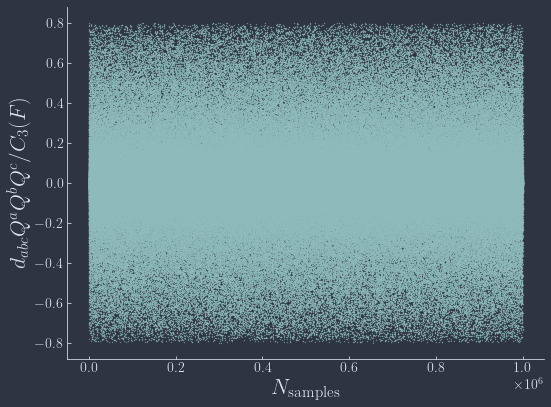

In [4]:
import matplotlib.pyplot as plt
plt.style.use('nord_theme.mpltstyle')
plt.rcParams["figure.figsize"] = (8, 6)
plt.ylabel(r'$d_{abc}Q^aQ^bQ^c/C_3(F)$')
plt.xlabel(r'$N_\mathrm{samples}$')
plt.plot(np.divide(c3s, wanted_c3), linewidth=0, markersize=0.3, marker='o',mfc='none')
plt.tight_layout()
plt.savefig('brute_force_color_charges.png', dpi=300, transparent=False)